In [1]:
__authors__ = "Anton Gochev, Jaro Habr, Yan Jiang, Samuel Kahn"
__version__ = "XCS224u, Stanford, Spring 2021"

### A notbook containing charts analysing the learning rate of the models

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages
import experiment.helper as eh

#### Load data from files

In [2]:
DATA_PATH = os.path.join("data", "experiments")

In [5]:
vscores = eh.load_vscores(DATA_PATH)

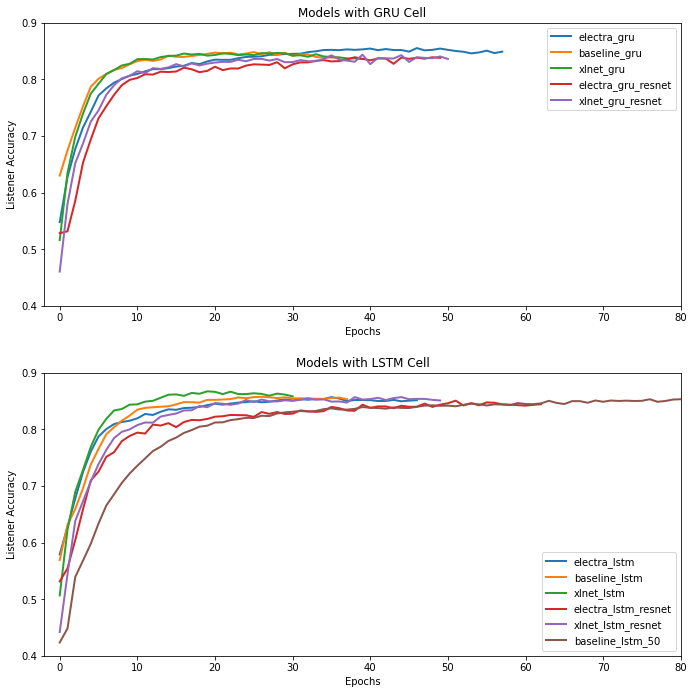

In [6]:
# print in two rows the learning rate of the models with GRU or LSTM
n_cols = 1
n_rows = 2
with PdfPages("lstm_gru.pdf") as pdf:
    fig, (ax_gru, ax_lstm) = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 10))
    ax_gru.set_xlabel("Epochs")
    ax_gru.set_ylabel("Listener Accuracy")
    ax_gru.set_title('Models with GRU Cell')
    ax_gru.set_ylim([0.4, 0.9])
    ax_gru.set_xlim([-2, 80])

    ax_lstm.set_xlabel("Epochs")
    ax_lstm.set_ylabel("Listener Accuracy")
    ax_lstm.set_title('Models with LSTM Cell')
    ax_lstm.set_ylim([0.4, 0.9])
    ax_lstm.set_xlim([-2, 80])

    gru = '_gru'
    for model in vscores.keys():
        if gru in model:
            ax_gru = pd.Series(vscores[model], name=model).plot(ax=ax_gru, legend=True, linewidth=2.0)
        else:
            ax_lstm = pd.Series(vscores[model], name=model).plot(ax=ax_lstm, legend=True, linewidth=2.0)

    fig.tight_layout(pad=2.0)
    pdf.savefig(bbox_inches='tight')

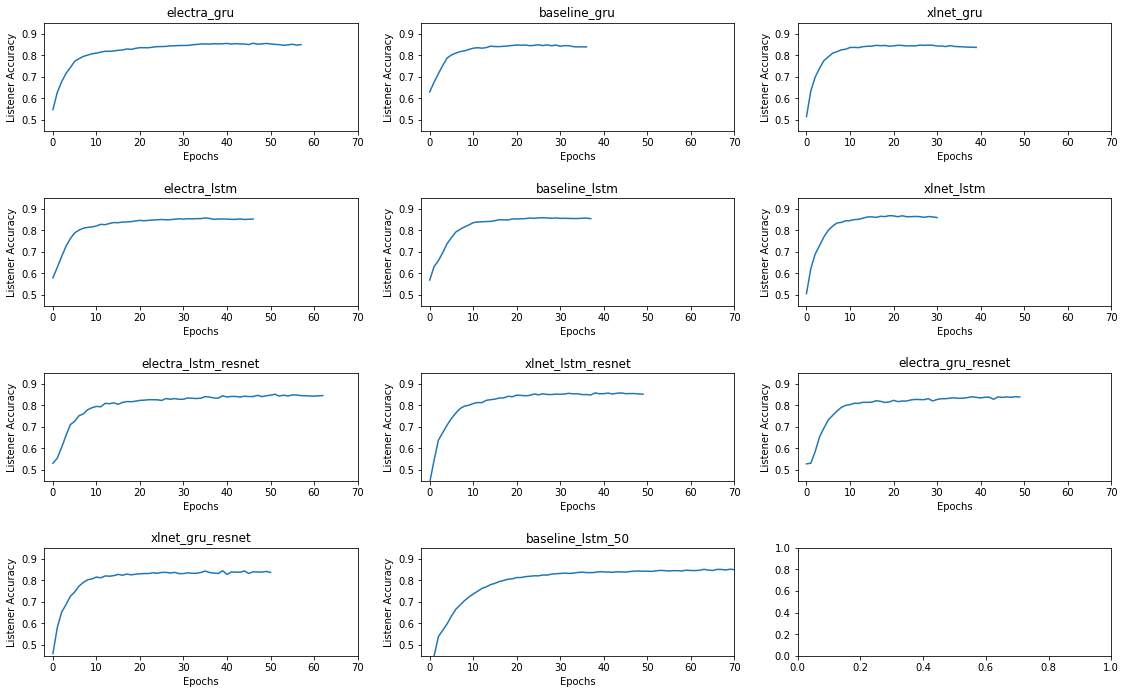

In [24]:
#print all in three columns
n_cols = 3
n_rows = round(len(vscores) / n_cols) # + 1 if len(vscores) % n_cols > 0 else 0
with PdfPages("all.pdf") as pdf:
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16, 10))
    scores = list(vscores.values())
    models = list(vscores.keys())

    index = 0
    for row in axes:
        for ax in row:
            if index < len(scores):
                ax = pd.Series(scores[index]).plot(ax=ax)
                ax.set_xlabel("Epochs")
                ax.set_ylabel("Listener Accuracy")
                ax.set_title(models[index])
                ax.set_ylim([0.45, 0.95])
                ax.set_xlim([-2, 70])
            index += 1
    fig.tight_layout(pad=2.0)
    pdf.savefig(bbox_inches='tight')